##Pipeline
1. Get data
2. Extract features
3. Clustering

# Download Data

https://www.kaggle.com/mikhailverghese/cigarette-reviews-by-smokers

In [1]:
!gdown --id 1ySNp84n4er1_rAYdLMcchMg7eMChoZcZ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ySNp84n4er1_rAYdLMcchMg7eMChoZcZ
To: /content/smokerdata.csv
100% 410k/410k [00:00<00:00, 151MB/s]


# Import Library

In [2]:
import pandas as pd
import numpy as np

### Read data from file

In [3]:
# นำข้อมูลจากไฟล์มาเก็บไว้ในตัวแปร
df_smoke = pd.read_csv('/content/smokerdata.csv')
df_smoke.head()

,User,Brand,Variety,Type,Date,Strength,Taste,Price,Rating
0,ghanta,Marlboro,Reds,Regular,2007-06-21,Medium,Tolerable,Fair,3
1,Karawasa,Marlboro,Reds,Regular,2007-06-23,Very Strong,Tolerable,Fair,4
2,Tintedace,Camel,Turkish Gold,Regular,2007-06-23,Medium,Very Poor,High,1
3,Karawasa,Camel,Turkish Gold,Regular,2007-06-23,Strong,Pleasant,Fair,4
4,Tintedace,Newport,Full Flavor,Regular,2007-06-23,Medium,Very Pleasant,Fair,5


### Exploratory Data Analysis (EDA)

In [4]:
# เช็คลักษณะข้อมูล
df_smoke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User      5438 non-null   object
 1   Brand     5438 non-null   object
 2   Variety   5438 non-null   object
 3   Type      5438 non-null   object
 4   Date      5438 non-null   object
 5   Strength  5438 non-null   object
 6   Taste     5438 non-null   object
 7   Price     5438 non-null   object
 8   Rating    5438 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 382.5+ KB


In [5]:
# เช็คสถิติเบื้องต้นของข้อมูล
df_smoke.describe()

,Rating
count,5438.000000
mean,3.929386
std,1.206847
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [6]:
# ดูจำนวนข้อมูลที่ซำกันในแต่ละคอลัมน์
df_smoke.nunique()

User        2953
Brand         24
Variety       56
Type           6
Date        2188
Strength       5
Taste          5
Price          5
Rating         5
dtype: int64

In [7]:
df_smoke["Brand"].value_counts()

Marlboro             1654
Camel                 877
Pall Mall             527
Newport               475
American Spirit       393
KOOL                  157
L&M                   149
Lucky Strike          143
Benson and Hedges     131
Winston               121
Parliament            121
Djarum                116
Virginia Slims        103
Maverick               86
Pyramid                60
USA Gold               59
305's                  54
Nat Sherman            54
Sonoma                 30
Dunhill                30
Salem                  26
marlboro               26
Basic                  25
Misty                  21
Name: Brand, dtype: int64

In [8]:
df_smoke.columns

Index(['User', 'Brand', 'Variety', 'Type', 'Date', 'Strength', 'Taste',
       'Price', 'Rating'],
      dtype='object')

In [9]:
df_smoke[df_smoke["Brand"] == "Marlboro"]["Rating"].value_counts(normalize=True)

5    0.392382
4    0.285369
3    0.174123
2    0.085248
1    0.062878
Name: Rating, dtype: float64

In [10]:
df_smoke[(df_smoke["Brand"] == "Marlboro") & ((df_smoke["Rating"] == 2) | (df_smoke["Rating"] == 1))]

,User,Brand,Variety,Type,Date,Strength,Taste,Price,Rating
9,Grimey,Marlboro,Blend No. 27,Regular,2007-06-23,Weak,Poor,Fair,2
17,Ogiona,Marlboro,Lights,Regular,2007-06-23,Weak,Tolerable,Fair,2
24,Malboroman,Marlboro,Medium,Regular,2007-06-24,Medium,Very Poor,Fair,1
26,randiskop01,Marlboro,Menthol Lights,Regular,2007-06-24,Weak,Poor,Fair,2
53,Freed Turkey,Marlboro,Smooth Menthol,Regular,2007-06-30,Medium,Tolerable,High,2
...,...,...,...,...,...,...,...,...,...
5333,PE187,Marlboro,Special Blend (Red),100s,2017-07-07,Medium,Tolerable,High,2
5338,Cigs&amp;Coke Review,Marlboro,Reds,100s,2017-07-10,Very Weak,Poor,Fair,1
5350,RobbyR,Marlboro,Ultra Lights,Regular,2017-07-22,Very Weak,Poor,Low,2
5354,RobbyR,Marlboro,Lights,Regular,2017-07-22,Weak,Poor,Fair,2


In [11]:
df_smoke['Rating'].unique()

array([3, 4, 1, 5, 2])

In [12]:
df_smoke['Type'].unique()

array(['Regular', '100s', 'Unfiltered', '120s', 'Menthol', 'Shorts'],
      dtype=object)

In [13]:
df_smoke.groupby(['Date','User']).size().reset_index()

,Date,User,0
0,2007-06-21,ghanta,1
1,2007-06-23,Ariel,1
2,2007-06-23,Gracefuldrunk,1
3,2007-06-23,Grimey,4
4,2007-06-23,Karawasa,8
...,...,...,...
3767,2018-09-23,Newportlover82,1
3768,2018-11-18,sahrah120s,2
3769,2019-01-24,floras,1
3770,2019-01-26,Monijonnlopez,1


In [14]:
df_smoke.groupby(['Brand','Variety', 'Type', 'Strength','Price']).size().reset_index()

,Brand,Variety,Type,Strength,Price,0
0,305's,Full Flavor,100s,Medium,Fair,5
1,305's,Full Flavor,100s,Medium,High,2
2,305's,Full Flavor,100s,Medium,Low,1
3,305's,Full Flavor,100s,Strong,Fair,9
4,305's,Full Flavor,100s,Strong,High,2
...,...,...,...,...,...,...
1212,marlboro,special blend,100s,Strong,Low,1
1213,marlboro,special blend,100s,Strong,Very High,1
1214,marlboro,special blend,100s,Very Strong,High,1
1215,marlboro,special blend,100s,Very Strong,Low,1


# Preprocess Data

In [15]:
# เลือกข้อมูลที่คนให้คะแนน 5 ดาว
df_rating_5 = df_smoke[df_smoke['Rating'] == 5]
df_rating_5.head()

,User,Brand,Variety,Type,Date,Strength,Taste,Price,Rating
4,Tintedace,Newport,Full Flavor,Regular,2007-06-23,Medium,Very Pleasant,Fair,5
11,Lothar,American Spirit,Mediums,Regular,2007-06-23,Strong,Very Pleasant,High,5
16,Grimey,Camel,Lights,Regular,2007-06-23,Medium,Very Pleasant,Low,5
27,Joe Camel,Camel,Wides Filters,Regular,2007-06-24,Strong,Pleasant,Fair,5
43,raytheon,Lucky Strike,Filters,Regular,2007-06-28,Medium,Pleasant,High,5


In [16]:
df_rating_5['Strength'].value_counts()

Strong         1018
Medium          868
Very Strong     346
Weak             71
Very Weak        14
Name: Strength, dtype: int64

In [17]:
df_rating_5['Taste'].value_counts()

Very Pleasant    1764
Pleasant          527
Tolerable          20
Very Poor           4
Poor                2
Name: Taste, dtype: int64

In [18]:
df_rating_5['Price'].value_counts()

Fair         997
High         673
Very High    340
Low          219
Very Low      88
Name: Price, dtype: int64

In [19]:
# เลือกข้อมูลที่มีจำนวนมากที่สุดในแต่ละคอลัมน์
df_pre_smoke = df_rating_5[(df_rating_5['Strength']=='Strong')&(df_rating_5['Taste']=='Very Pleasant')&(df_rating_5['Price']=='Fair')]
df_pre_smoke

,User,Brand,Variety,Type,Date,Strength,Taste,Price,Rating
99,thomw,Camel,Filters Full Flavor,Regular,2007-07-12,Strong,Very Pleasant,Fair,5
120,homer676,Camel,Filters Full Flavor,Regular,2007-08-02,Strong,Very Pleasant,Fair,5
172,Rambus,Lucky Strike,Classic,Unfiltered,2007-08-16,Strong,Very Pleasant,Fair,5
180,Alex Umrysh,Camel,Filters Full Flavor,Regular,2007-08-20,Strong,Very Pleasant,Fair,5
202,Kaijapska,Camel,Filters Full Flavor,Regular,2007-08-29,Strong,Very Pleasant,Fair,5
...,...,...,...,...,...,...,...,...,...
5409,docmarlboro,Camel,Filters Full Flavor,Regular,2018-03-26,Strong,Very Pleasant,Fair,5
5423,Heike,L&M,Full Flavor,100s,2018-08-14,Strong,Very Pleasant,Fair,5
5424,Heike,L&M,Full Flavor,100s,2018-08-14,Strong,Very Pleasant,Fair,5
5427,Heike,Parliament,Full Flavor,Regular,2018-08-14,Strong,Very Pleasant,Fair,5


In [20]:
df_pre_smoke.nunique()

User        309
Brand        21
Variety      42
Type          5
Date        299
Strength      1
Taste         1
Price         1
Rating        1
dtype: int64

In [21]:
df_pre_smoke.shape

(330, 9)

In [22]:
df_pre_smoke['Type'].value_counts()

Regular       197
100s          111
Unfiltered     11
Shorts          6
120s            5
Name: Type, dtype: int64

In [23]:
df_pre_smoke['Type'].value_counts().index[0]

'Regular'

In [24]:
df_pre_smoke = df_pre_smoke[df_pre_smoke['Type'] == 'Regular']
df_pre_smoke.head()

,User,Brand,Variety,Type,Date,Strength,Taste,Price,Rating
99,thomw,Camel,Filters Full Flavor,Regular,2007-07-12,Strong,Very Pleasant,Fair,5
120,homer676,Camel,Filters Full Flavor,Regular,2007-08-02,Strong,Very Pleasant,Fair,5
180,Alex Umrysh,Camel,Filters Full Flavor,Regular,2007-08-20,Strong,Very Pleasant,Fair,5
202,Kaijapska,Camel,Filters Full Flavor,Regular,2007-08-29,Strong,Very Pleasant,Fair,5
287,EmphyzemaWOOHOO,Camel,Turkish Royal,Regular,2007-09-19,Strong,Very Pleasant,Fair,5


In [25]:
df_pre_smoke.shape

(197, 9)

In [26]:
df_brand = df_pre_smoke.drop(['User', 'Type', 'Date', 'Strength', 'Taste', 'Price', 'Rating'], axis=1)
df_brand.head()

,Brand,Variety
99,Camel,Filters Full Flavor
120,Camel,Filters Full Flavor
180,Camel,Filters Full Flavor
202,Camel,Filters Full Flavor
287,Camel,Turkish Royal


In [27]:
df_brand

,Brand,Variety
99,Camel,Filters Full Flavor
120,Camel,Filters Full Flavor
180,Camel,Filters Full Flavor
202,Camel,Filters Full Flavor
287,Camel,Turkish Royal
...,...,...
5323,Camel,Crush
5396,USA Gold,Full Flavor
5406,Marlboro,Full Flavor
5409,Camel,Filters Full Flavor


## Content Base filtering

In [28]:
count = df_brand.groupby(['Brand','Variety']).size().reset_index(name = 'count')
count.head()

,Brand,Variety,count
0,305's,Full Flavor,1
1,American Spirit,Full Flavor,2
2,American Spirit,Lights,1
3,American Spirit,Menthol,2
4,American Spirit,Menthol Lights,1


In [29]:
count.describe()

,count
count,50.00000
mean,3.94000
std,5.00779
min,1.00000
25%,1.00000
50%,2.00000
75%,5.00000
max,25.00000


In [30]:
count[count['count'] >= 10]

,Brand,Variety,count
10,Camel,Filters Full Flavor,23
15,Camel,Turkish Royal,10
16,Camel,Wides Filters,12
32,Marlboro,Reds,25
34,Marlboro,Smooth Menthol,11


In [31]:
df_select = df_smoke[(df_smoke["Strength"] == "Medium") & (df_smoke["Taste"] == "Pleasant")]
df_select.groupby(['Brand','Variety']).size().reset_index(name = 'count').sort_values("count", ascending=False).head(10)

,Brand,Variety,count
48,Marlboro,Lights,35
72,Pall Mall,Full Flavor,32
68,Newport,Full Flavor,29
13,Camel,Crush,28
53,Marlboro,Reds,28
41,Marlboro,Black,27
69,Newport,Menthol,27
55,Marlboro,Smooth Menthol,26
44,Marlboro,Blend No. 27,26
34,L&M,Full Flavor,25


In [32]:
def content_data(rating,Strength,Taste,Price,Type):
  df = df_smoke[df_smoke['Rating']== rating]
  df = df[(df['Strength'] == Strength)&(df['Taste'] == Taste)&(df['Price'] == Price)]
  df = df[df['Type'] == Type]
  df = df.drop(['User', 'Type', 'Date', 'Strength', 'Taste', 'Price', 'Rating'], axis=1)
  df = df.groupby(['Brand','Variety']).size().reset_index(name = 'count')
  df = df[df['count'] >= 10]
  return df

In [33]:
recomended = content_data(4,'Medium','Pleasant','Fair','Regular')
recomended

,Brand,Variety,count
5,Camel,Crush,14
8,Camel,Lights,11
15,Camel,Turkish Gold,12
28,Marlboro,Blend No. 27,10
38,Marlboro,Smooth Menthol,11


## Collaborative filtering

### Create User X Rating matrix

In [34]:
df_smoke['Brand_variety'] = df_smoke[['Brand', 'Variety']].apply(lambda x: '_'.join(x), axis=1)
df_smoke.head()

,User,Brand,Variety,Type,Date,Strength,Taste,Price,Rating,Brand_variety
0,ghanta,Marlboro,Reds,Regular,2007-06-21,Medium,Tolerable,Fair,3,Marlboro_Reds
1,Karawasa,Marlboro,Reds,Regular,2007-06-23,Very Strong,Tolerable,Fair,4,Marlboro_Reds
2,Tintedace,Camel,Turkish Gold,Regular,2007-06-23,Medium,Very Poor,High,1,Camel_Turkish Gold
3,Karawasa,Camel,Turkish Gold,Regular,2007-06-23,Strong,Pleasant,Fair,4,Camel_Turkish Gold
4,Tintedace,Newport,Full Flavor,Regular,2007-06-23,Medium,Very Pleasant,Fair,5,Newport_Full Flavor


In [35]:
cmat = pd.crosstab(df_smoke['User'],df_smoke['Brand_variety'],values = df_smoke['Rating'],aggfunc='mean')
cmat

Brand_variety,305's_Full Flavor,American Spirit_Full Flavor,American Spirit_Lights,American Spirit_Mediums,American Spirit_Menthol,American Spirit_Menthol Lights,American Spirit_Organic,American Spirit_Perique,American Spirit_Ultra Lights,Basic_Full Flavor,...,Pyramid_Full Flavor,Salem_Green Label Full Flavor,Sonoma_Full Flavor,USA Gold_Full Flavor,Virginia Slims_Full Flavor,Virginia Slims_Luxury Lights,Virginia Slims_Menthol,Winston_Full Flavor,Winston_Lights,marlboro_special blend
User,,,,,,,,,,,,,,,,,,,,,
SavvLovesCamel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!Eureka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#1gramma,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$ixtiesFreak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00000,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoey05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zoey0505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zolimarsn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
cmat = cmat.fillna(0)
cmat

Brand_variety,305's_Full Flavor,American Spirit_Full Flavor,American Spirit_Lights,American Spirit_Mediums,American Spirit_Menthol,American Spirit_Menthol Lights,American Spirit_Organic,American Spirit_Perique,American Spirit_Ultra Lights,Basic_Full Flavor,...,Pyramid_Full Flavor,Salem_Green Label Full Flavor,Sonoma_Full Flavor,USA Gold_Full Flavor,Virginia Slims_Full Flavor,Virginia Slims_Luxury Lights,Virginia Slims_Menthol,Winston_Full Flavor,Winston_Lights,marlboro_special blend
User,,,,,,,,,,,,,,,,,,,,,
SavvLovesCamel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!Eureka,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#1gramma,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$ixtiesFreak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00000,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoey05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zoey0505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zolimarsn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
User = df_smoke['User'].unique()

In [38]:
User

array(['ghanta', 'Karawasa', 'Tintedace', ..., 'floras', 'Monijonnlopez',
       'sherrim929'], dtype=object)

In [39]:
num_name_user = list(range(len(User)))
cmat.index = num_name_user
cmat

Brand_variety,305's_Full Flavor,American Spirit_Full Flavor,American Spirit_Lights,American Spirit_Mediums,American Spirit_Menthol,American Spirit_Menthol Lights,American Spirit_Organic,American Spirit_Perique,American Spirit_Ultra Lights,Basic_Full Flavor,...,Pyramid_Full Flavor,Salem_Green Label Full Flavor,Sonoma_Full Flavor,USA Gold_Full Flavor,Virginia Slims_Full Flavor,Virginia Slims_Luxury Lights,Virginia Slims_Menthol,Winston_Full Flavor,Winston_Lights,marlboro_special blend
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2951,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Decompose Matrix into two matrices using NMF

In [40]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=30)
nmf.fit(cmat)

NMF(n_components=30)

In [41]:
nmf.components_.shape

(30, 92)

In [42]:
H = pd.DataFrame(np.round(nmf.components_,2), columns=cmat.columns)
H

Brand_variety,305's_Full Flavor,American Spirit_Full Flavor,American Spirit_Lights,American Spirit_Mediums,American Spirit_Menthol,American Spirit_Menthol Lights,American Spirit_Organic,American Spirit_Perique,American Spirit_Ultra Lights,Basic_Full Flavor,...,Pyramid_Full Flavor,Salem_Green Label Full Flavor,Sonoma_Full Flavor,USA Gold_Full Flavor,Virginia Slims_Full Flavor,Virginia Slims_Luxury Lights,Virginia Slims_Menthol,Winston_Full Flavor,Winston_Lights,marlboro_special blend
0,0.00,0.00,0.00,0.52,0.00,0.00,0.00,0.00,0.04,0.00,...,0.00,0.27,0.00,0.00,0.00,0.0,0.07,0.00,0.76,0.0
1,0.01,0.00,0.00,0.00,0.04,0.01,0.03,0.00,0.01,0.00,...,0.00,0.00,0.01,0.01,0.00,0.0,0.10,0.00,0.09,0.0
2,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.03,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.03,0.0
3,0.00,0.00,0.16,0.00,0.00,0.03,0.00,0.00,0.00,0.02,...,0.00,0.13,0.00,0.00,0.00,0.0,0.03,0.00,0.06,0.0
4,0.00,0.00,0.00,0.08,0.00,0.00,0.11,0.00,0.00,0.05,...,0.05,0.06,0.04,0.03,0.01,0.0,0.00,0.00,0.00,0.0
5,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.21,...,0.04,0.11,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0
6,0.00,0.00,0.19,0.00,0.00,0.24,0.00,0.01,0.23,0.00,...,0.00,0.03,0.00,0.00,0.00,0.0,0.00,0.00,0.25,0.0
7,0.00,0.00,0.04,0.04,0.63,0.09,0.00,0.00,0.00,0.27,...,0.00,0.00,0.04,0.42,0.00,0.0,0.00,0.00,0.00,0.0
8,0.00,0.00,0.52,1.17,0.03,0.00,1.43,0.00,0.00,0.36,...,0.00,0.00,0.24,0.48,0.00,0.0,0.00,0.00,0.00,0.0
9,0.06,0.00,0.25,0.17,0.00,0.47,0.06,0.00,0.25,0.11,...,0.00,0.19,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0


In [43]:
W = pd.DataFrame(np.round(nmf.transform(cmat),2), columns=H.index)
W

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00
1,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.01,0.01,0.01,...,0.0,0.00,0.01,0.00,0.00,0.18,0.00,0.00,0.00,0.02
2,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.07
3,0.00,0.0,0.0,0.00,0.00,0.0,0.01,0.00,0.00,0.00,...,0.0,0.02,0.02,0.00,0.00,0.00,0.04,0.00,0.00,0.09
4,0.00,0.0,0.0,0.47,0.01,0.0,0.01,0.01,0.02,0.01,...,0.0,0.04,0.02,0.00,0.00,0.00,0.09,0.17,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2949,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2950,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.00,0.00
2951,0.13,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.02,0.00,0.13,0.05,0.00,0.00,0.00


In [44]:
cmat

Brand_variety,305's_Full Flavor,American Spirit_Full Flavor,American Spirit_Lights,American Spirit_Mediums,American Spirit_Menthol,American Spirit_Menthol Lights,American Spirit_Organic,American Spirit_Perique,American Spirit_Ultra Lights,Basic_Full Flavor,...,Pyramid_Full Flavor,Salem_Green Label Full Flavor,Sonoma_Full Flavor,USA Gold_Full Flavor,Virginia Slims_Full Flavor,Virginia Slims_Luxury Lights,Virginia Slims_Menthol,Winston_Full Flavor,Winston_Lights,marlboro_special blend
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2951,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
reconstructed = pd.DataFrame(np.round(np.dot(W,H),2), columns=cmat.columns)
reconstructed.index = cmat.index
reconstructed

Brand_variety,305's_Full Flavor,American Spirit_Full Flavor,American Spirit_Lights,American Spirit_Mediums,American Spirit_Menthol,American Spirit_Menthol Lights,American Spirit_Organic,American Spirit_Perique,American Spirit_Ultra Lights,Basic_Full Flavor,...,Pyramid_Full Flavor,Salem_Green Label Full Flavor,Sonoma_Full Flavor,USA Gold_Full Flavor,Virginia Slims_Full Flavor,Virginia Slims_Luxury Lights,Virginia Slims_Menthol,Winston_Full Flavor,Winston_Lights,marlboro_special blend
0,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.00,0.00,0.00,...,0.01,0.00,0.17,0.35,0.00,0.00,0.00,0.00,0.00,0.0
1,0.01,0.00,0.31,0.02,0.02,0.01,0.07,0.00,0.06,0.04,...,0.00,0.04,0.03,0.01,0.03,0.00,0.00,0.00,0.18,0.0
2,0.05,0.08,0.01,0.00,0.04,0.01,0.00,0.00,0.00,0.02,...,0.02,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.0
3,0.06,0.00,0.04,0.01,0.08,0.03,0.02,0.13,0.01,0.04,...,0.01,0.02,0.03,0.03,0.00,0.00,0.00,0.24,0.05,0.0
4,0.03,0.15,0.19,0.04,0.13,0.10,0.07,0.26,0.02,0.12,...,0.26,0.11,0.06,0.07,0.02,0.00,0.05,0.54,0.13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,0.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2949,0.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2950,0.03,0.00,0.00,0.00,0.04,0.04,0.02,0.00,0.00,0.06,...,0.47,0.00,0.02,0.00,0.01,0.00,0.06,0.00,0.00,0.0
2951,0.00,0.08,0.22,0.07,0.00,0.00,0.04,0.00,0.04,0.02,...,0.00,0.08,0.01,0.03,0.03,0.12,0.01,0.30,0.20,0.0


In [46]:
cmat

Brand_variety,305's_Full Flavor,American Spirit_Full Flavor,American Spirit_Lights,American Spirit_Mediums,American Spirit_Menthol,American Spirit_Menthol Lights,American Spirit_Organic,American Spirit_Perique,American Spirit_Ultra Lights,Basic_Full Flavor,...,Pyramid_Full Flavor,Salem_Green Label Full Flavor,Sonoma_Full Flavor,USA Gold_Full Flavor,Virginia Slims_Full Flavor,Virginia Slims_Luxury Lights,Virginia Slims_Menthol,Winston_Full Flavor,Winston_Lights,marlboro_special blend
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2951,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
import re

def recomendation(uid,topk=5):
  res = reconstructed.T[uid].sort_values(ascending=False)[0:topk]
  res = list(res[res>0].index)
  res = df_smoke[df_smoke['Brand_variety'].isin(res)]
  res = res.drop_duplicates(subset='Brand_variety')
  res = res[:topk]
  res = res[['Brand_variety','Strength','Taste','Price']]
  return res

In [48]:
def recomendation_cmat(uid,topk=5):
  res = cmat.T[uid].sort_values(ascending=False)[0:topk]
  res = list(res[res>0].index)
  res = df_smoke[df_smoke['Brand_variety'].isin(res)]
  res = res.drop_duplicates(subset='Brand_variety')
  res = res[:topk]
  res = res[['Brand_variety','Strength','Taste','Price']]
  return res

In [49]:
user = 1

In [50]:
res = recomendation_cmat(user,topk=10)
res

,Brand_variety,Strength,Taste,Price
16,Camel_Lights,Medium,Very Pleasant,Low
137,Pall Mall_Lights (Blue),Weak,Tolerable,Fair
326,L&M_Lights,Medium,Very Pleasant,Fair


In [51]:
res = recomendation(user,topk=10)
res

,Brand_variety,Strength,Taste,Price
8,Parliament_Lights (White),Medium,Tolerable,Fair
16,Camel_Lights,Medium,Very Pleasant,Low
18,American Spirit_Lights,Medium,Pleasant,High
20,Winston_Lights,Weak,Poor,Fair
26,Marlboro_Menthol Lights,Weak,Poor,Fair
32,Parliament_Full Flavor,Medium,Tolerable,Fair
40,Marlboro_Menthol Milds,Medium,Pleasant,Low
137,Pall Mall_Lights (Blue),Weak,Tolerable,Fair
325,Marlboro_Virginia Blend,Strong,Very Pleasant,High
1865,Pall Mall_Reds,Medium,Very Pleasant,Fair


# Movies Data

## Download Data

In [52]:
!gdown --id 1woyznL9rtKIALYdfKulYyxtjetcST4HU
!gdown --id 1mCwvXi4P0LjNHi_H-B9QSXHXopKPrM7d
!gdown --id 1dk-CILCnNi7Q3YrJEcjmuxRHLxBmNdKF

!unzip movie_rating.zip
!unzip movie_meta.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1woyznL9rtKIALYdfKulYyxtjetcST4HU
To: /content/movie_rating.zip
100% 675k/675k [00:00<00:00, 138MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1mCwvXi4P0LjNHi_H-B9QSXHXopKPrM7d
To: /content/movie_meta.zip
100% 12.8M/12.8M [00:00<00:00, 46.6MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.c

In [53]:
moviemeta = pd.read_csv('movies_metadata.csv')
moviemeta.head()

<ipython-input-53-fbfeca549533>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  moviemeta = pd.read_csv('movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [54]:
moviemeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [55]:
moviemeta.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [56]:
ratingdat = pd.read_csv('ratings_small.csv')
ratingdat

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [57]:
ratingdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [58]:
ratingdat.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [59]:
linkdat = pd.read_csv('movie_link_small.csv')
linkdat.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [60]:
linkdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


In [61]:
linkdat.describe()

,movieId,imdbId,tmdbId
count,9125.000000,9.125000e+03,9112.000000
mean,31123.291836,4.798244e+05,39104.545544
std,40782.633604,7.431774e+05,62814.519801
min,1.000000,4.170000e+02,2.000000
25%,2850.000000,8.884600e+04,9451.750000
50%,6290.000000,1.197780e+05,15852.000000
75%,56274.000000,4.284410e+05,39160.500000
max,164979.000000,5.794766e+06,416437.000000


In [62]:
moviedat = linkdat.join(moviemeta,on='tmdbId',how='left')
moviedat

,movieId,imdbId,tmdbId,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,114709,862.0,False,NaN,0,[],NaN,101230,tt0109001,...,1994-09-01,0.0,0.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,NaN,1-900,False,5.0,1.0
1,2,113497,8844.0,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,48677,tt0087065,...,1984-08-10,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You can cry 'wolf' once too often!,Cloak & Dagger,False,6.2,40.0
2,3,113228,15602.0,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 99, 'name...",http://www.the2escobars.com,53190,tt2700330,...,2010-06-22,0.0,100.0,[],Released,Sometimes it really is a matter of life and de...,The Two Escobars,False,7.6,14.0
3,4,114885,31357.0,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...",NaN,137310,tt0472576,...,2006-07-08,0.0,84.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Wild Hearts,False,5.0,4.0
4,5,113041,11862.0,False,"{'id': 325798, 'name': 'Star Crash Collection'...",0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 878, 'n...",NaN,22049,tt0079946,...,1978-12-21,0.0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A galactic adventure beyond your wildest dreams!,Starcrash,False,4.3,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9120,162672,3859980,402672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9121,163056,4262980,315011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9122,163949,2531318,391698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9123,164977,27660,137608.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create User X Rating matrix

In [63]:
ratingdat.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [64]:
cmat = pd.crosstab(ratingdat['userId'],ratingdat['movieId'],ratingdat['rating'],aggfunc=sum)
cmat

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
cmat = cmat.fillna(0)
cmat

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Decompose Matrix into two matrices using NMF

In [66]:
from sklearn.decomposition import NMF
nmf = NMF(100)
nmf.fit(cmat)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=100)

In [67]:
cmat

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
H = pd.DataFrame(np.round(nmf.components_,2), columns=cmat.columns)
H

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
1,0.00,0.00,0.01,0.00,0.01,0.19,0.39,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
2,0.00,1.78,0.52,0.17,0.66,0.56,0.49,0.18,0.34,0.81,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
3,0.00,0.00,0.00,0.01,0.00,1.86,0.04,0.00,1.04,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
4,0.86,0.00,0.00,0.00,0.00,0.61,0.49,0.00,0.00,0.00,...,0.61,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.20,0.15,0.00,0.00,0.12,0.00,0.00,0.00,0.02,0.33,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.00
96,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
97,0.68,0.48,0.00,0.00,0.00,0.51,0.00,0.00,0.04,0.57,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
98,0.06,0.08,0.00,0.00,0.13,0.00,0.22,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00


In [69]:
W = pd.DataFrame(np.round(nmf.transform(cmat),2), columns=H.index)
W

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.00,0.04,0.00,0.02,0.0,0.0,0.0,0.0,0.01,0.00,...,0.0,0.00,0.00,0.00,0.02,0.00,0.00,0.0,0.00,0.02
1,0.00,0.00,0.66,0.00,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.79,0.00,0.00,0.00,0.0,0.00,0.00
2,0.17,0.00,0.00,0.03,0.0,0.0,0.0,0.0,0.02,0.00,...,0.0,0.00,0.00,0.21,0.00,0.00,0.00,0.0,0.00,0.00
3,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.02,0.00,0.00,0.00,0.0,0.00,0.00
4,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.00,0.25,0.00,0.00,0.23,0.00,0.0,0.09,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.00,0.00,0.35,0.00,0.0,0.0,0.0,0.0,0.01,0.00,...,0.0,0.00,0.00,0.39,0.00,0.00,0.00,0.0,0.00,0.00
667,0.14,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.00,0.02,0.03,0.00,0.00,0.15,0.0,0.00,0.00
668,0.00,0.00,0.00,0.08,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
669,0.15,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.03,0.00,...,0.0,0.02,0.00,0.18,0.00,0.00,0.00,0.0,0.00,0.00


In [70]:
reconstructed = pd.DataFrame(np.round(np.dot(W,H),2), columns=cmat.columns)
reconstructed.index = cmat.index
reconstructed

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.02,0.02,0.00,0.00,0.00,0.06,0.03,0.00,0.02,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,0.97,1.54,0.34,0.15,0.44,0.90,0.32,0.12,0.22,2.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,0.70,0.27,0.02,0.01,0.09,0.17,0.03,0.01,0.03,0.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,0.01,0.94,1.29,0.00,0.00,0.01,0.02,0.00,0.00,3.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
5,1.14,0.81,0.09,0.03,1.17,0.53,0.15,0.00,0.01,0.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,1.54,0.81,0.49,0.13,0.44,1.24,0.43,0.08,0.26,1.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
668,0.41,0.06,0.00,0.00,0.00,0.26,0.04,0.00,0.00,0.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
669,0.31,0.00,0.05,0.00,0.06,0.22,0.05,0.00,0.11,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


In [71]:
cmat

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create Application

In [72]:
import re

def recomendation(uid,topk=5):
  res = list(reconstructed.T[uid].sort_values(ascending=False)[0:topk].index)
  res = moviedat[moviedat['movieId'].isin(res)]
  res['genre'] = [re.findall(r"name': '(.*?)'}", res) for res in res['genres']]
  mList = ratingdat[ratingdat['userId']==uid][['movieId','rating']]
  #return mList, res
  res = res.merge(mList,on='movieId',how='left')
  #return res
  res = res[['movieId','title','genre','rating']]
  return res

In [73]:
res = recomendation(10,topk=10)
res

<ipython-input-72-8f299764d0aa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['genre'] = [re.findall(r"name': '(.*?)'}", res) for res in res['genres']]


,movieId,title,genre,rating
0,260,Dracula: Dead and Loving It,"[Comedy, Horror]",NaN
1,318,Nell,"[Drama, Thriller]",4.0
2,589,New York Cop,"[Action, Thriller, Crime, Drama]",NaN
3,1036,Bhaji on the Beach,"[Comedy, Drama]",3.0
4,1196,Lethal Weapon,"[Adventure, Action, Comedy, Thriller, Crime]",4.0
5,1198,White Squall,"[Action, Drama]",4.0
6,1210,Lethal Weapon 2,"[Action, Adventure, Comedy, Crime, Thriller]",4.0
7,1270,Muppet Treasure Island,"[Action, Comedy, Music, Family, Adventure]",NaN
8,1291,The Journey of August King,[Drama],4.0
9,2571,Hellraiser: Bloodline,"[Horror, Thriller, Science Fiction]",5.0


In [74]:
res1 = list(reconstructed.T[10].sort_values(ascending=False)[0:5].index)
res1 = moviedat[moviedat['movieId'].isin(res1)]
res1 = res1.iloc[0]
res1genre = res1['genres']
re.findall(r"name': '(.*?)'}", res1genre)

['Comedy', 'Horror']

In [75]:
res['genre'].iloc[0]

['Comedy', 'Horror']

In [76]:
recomendation(10,topk=30)

<ipython-input-72-8f299764d0aa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['genre'] = [re.findall(r"name': '(.*?)'}", res) for res in res['genres']]


,movieId,title,genre,rating
0,110,The Tie That Binds,[Thriller],NaN
1,260,Dracula: Dead and Loving It,"[Comedy, Horror]",NaN
2,296,The Substitute,"[Action, Thriller]",NaN
3,318,Nell,"[Drama, Thriller]",4.0
4,356,Nixon,"[History, Drama]",NaN
5,480,Vanya on 42nd Street,"[Drama, Romance]",NaN
6,527,Cabin Boy,[Comedy],NaN
7,541,The Juror,"[Drama, Thriller]",NaN
8,589,New York Cop,"[Action, Thriller, Crime, Drama]",NaN
9,593,Miami Rhapsody,"[Comedy, Romance]",NaN


In [77]:
## comedy horror type
userid = 398
topk = 20
recomendation(userid,topk)

<ipython-input-72-8f299764d0aa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['genre'] = [re.findall(r"name': '(.*?)'}", res) for res in res['genres']]


,movieId,title,genre,rating
0,260,Dracula: Dead and Loving It,"[Comedy, Horror]",NaN
1,541,The Juror,"[Drama, Thriller]",NaN
2,589,New York Cop,"[Action, Thriller, Crime, Drama]",NaN
3,1036,Bhaji on the Beach,"[Comedy, Drama]",NaN
4,1136,The Fan,"[Drama, Mystery, Thriller]",4.0
5,1196,Lethal Weapon,"[Adventure, Action, Comedy, Thriller, Crime]",4.0
6,1197,Get Real,"[Drama, Romance]",5.0
7,1198,White Squall,"[Action, Drama]",4.0
8,1200,Under The Domim Tree,"[Drama, Foreign]",NaN
9,1210,Lethal Weapon 2,"[Action, Adventure, Comedy, Crime, Thriller]",NaN


In [78]:
from scipy.spatial.distance import cosine
my_feature = np.zeros(len(reconstructed.iloc[0]))
my_feature[100] = 5
similarity = []
for idx in range(len(reconstructed)):
  similarity.append(1 - cosine(my_feature, reconstructed.iloc[idx].values))
similarity = pd.Series(similarity).fillna(0).tolist()
close_to = np.argsort(similarity)[-1]

## comedy romance drama type
userid = close_to
recomendation(userid,topk)

<ipython-input-72-8f299764d0aa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['genre'] = [re.findall(r"name': '(.*?)'}", res) for res in res['genres']]


,movieId,title,genre,rating
0,1,1-900,[],NaN
1,260,Dracula: Dead and Loving It,"[Comedy, Horror]",4.0
2,1196,Lethal Weapon,"[Adventure, Action, Comedy, Thriller, Crime]",4.0
3,1198,White Squall,"[Action, Drama]",4.0
4,1210,Lethal Weapon 2,"[Action, Adventure, Comedy, Crime, Thriller]",4.0
5,2571,Hellraiser: Bloodline,"[Horror, Thriller, Science Fiction]",3.5
6,3578,City Hall,"[Drama, Thriller]",4.0
7,4306,Ransom,"[Action, Thriller]",3.5
8,4886,Batman,"[Fantasy, Action]",3.5
9,4993,Boomerang,"[Comedy, Romance]",4.0


## Clustering

In [79]:
from sklearn.cluster import KMeans
X = reconstructed
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
cluster = kmeans.predict(X)
X['cluster'] = cluster
X['userId'] = X.index
ofeat = X.iloc[:,0:-2]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(ofeat)
pfeat = pca.transform(ofeat)

In [81]:
ndat = pd.DataFrame(data=pfeat,columns=['pca1','pca2','pca3'])
ndat['cluster'] = X['cluster'].values
ndat

,pca1,pca2,pca3,cluster
0,-12.798623,2.572590,2.878252,4
1,-6.264157,5.046146,-8.941372,0
2,-7.091017,-0.762495,0.745515,4
3,17.405481,6.409506,-9.454163,3
4,0.818896,-1.870433,-1.837034,4
...,...,...,...,...
666,-7.036666,5.078326,-5.016692,0
667,-9.932385,1.618951,3.249882,4
668,-10.018417,1.534312,1.900019,4
669,-8.003786,2.122840,0.758378,4


In [82]:
import matplotlib.pyplot as plt

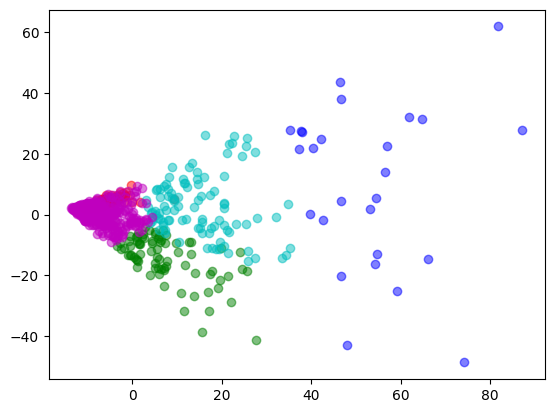

In [83]:
clist = ['r','b','g','c','m','k']
for i in list(range(0,5)):
  sdat = ndat[ndat['cluster']==i][['pca1','pca2']].values
  plt.scatter(x=sdat[:,0], y=sdat[:,1], c=clist[i], alpha=0.5)
